1. Importación de Librerías 

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

2. Carga de los datos

In [2]:
# Se cargan los datos. 
df_tracks=pd.read_csv('202210_Laboratorio1_data_Datos_Clasificacion_2022.csv', sep=';', encoding = 'utf-8', index_col=None, low_memory=False)

In [3]:
# Cantidad de datos y número de variables
df_tracks.shape

(100000, 27)

In [5]:
# Mostrar los datos
df_tracks.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,1,1,1,40,1,0,0,0,0,1,0,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,25,1,0,0,1,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
2,0,1,1,1,28,0,0,0,0,1,0,0,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
3,0,1,0,1,27,0,0,0,1,1,1,0,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
4,0,1,1,1,24,0,0,0,1,1,1,0,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


In [6]:
# Podemos ver los tipos de todas la variables.
df_tracks.dtypes

Diabetes_012             object
HighBP                   object
HighChol                 object
CholCheck                object
BMI                      object
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                 object
PhysHlth                 object
DiffWalk                 object
Sex                      object
Age                      object
Education                object
Income                   object
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24             float64
Unnamed: 25             float64
Unnamed: 26             float64
dtype: object

In [7]:
# Y hacer una descripción de los datos
df_tracks.describe()

,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [8]:
# Se observa que hay ausencias, en particular en la variable "decibel_range". Veamos cuantas, para todas las variables:
df_tracks.isnull().sum()

Diabetes_012                16
HighBP                      18
HighChol                     9
CholCheck                   16
BMI                         19
Smoker                      21
Stroke                      13
HeartDiseaseorAttack        13
PhysActivity                15
Fruits                      24
Veggies                     11
HvyAlcoholConsump           12
AnyHealthcare               16
NoDocbcCost                 22
GenHlth                     18
MentHlth                    14
PhysHlth                    22
DiffWalk                    13
Sex                          9
Age                         12
Education                   19
Income                       1
Unnamed: 22             100000
Unnamed: 23             100000
Unnamed: 24             100000
Unnamed: 25             100000
Unnamed: 26             100000
dtype: int64

3. Limpieza y preparación de datos

In [9]:
# Hacemos una copia para llevar a cabo los pasos de limpieza y preparación
df_tracks_t = df_tracks

In [10]:
# Se procede a eliminar aquellas columnas que estan vacias
df_tracks_t = df_tracks_t.drop(['Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26' ], axis=1)

In [11]:
# Cantidad de datos y número de variables
df_tracks_t.shape

(100000, 22)

In [12]:
df_tracks_t.isnull().sum()

Diabetes_012            16
HighBP                  18
HighChol                 9
CholCheck               16
BMI                     19
Smoker                  21
Stroke                  13
HeartDiseaseorAttack    13
PhysActivity            15
Fruits                  24
Veggies                 11
HvyAlcoholConsump       12
AnyHealthcare           16
NoDocbcCost             22
GenHlth                 18
MentHlth                14
PhysHlth                22
DiffWalk                13
Sex                      9
Age                     12
Education               19
Income                   1
dtype: int64

In [13]:
# Eliminación registros con ausencias
df_tracks_t = df_tracks_t.dropna()
# Eliminación de registros duplicados.
df_tracks_t = df_tracks_t.drop_duplicates()

In [14]:
df_tracks_t.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825,93825
unique,6,5,5,5,95,5,5,5,5,5,5,5,5,5,8,49,54,5,5,16,9,11
top,0,0,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8
freq,78022,51469,52199,90210,8871,50549,89676,84530,70134,58408,75476,88164,88867,85637,32328,62601,56605,77223,52759,12219,38640,31883


In [15]:
colNames = df_tracks_t.columns
for i in colNames:
    print (df_tracks_t[i].describe())
    print ("_______________________________________")

count     93825
unique        6
top           0
freq      78022
Name: Diabetes_012, dtype: object
_______________________________________
count     93825
unique        5
top           0
freq      51469
Name: HighBP, dtype: object
_______________________________________
count     93825
unique        5
top           0
freq      52199
Name: HighChol, dtype: object
_______________________________________
count     93825
unique        5
top           1
freq      90210
Name: CholCheck, dtype: object
_______________________________________
count     93825
unique       95
top          27
freq       8871
Name: BMI, dtype: object
_______________________________________
count     93825
unique        5
top           0
freq      50549
Name: Smoker, dtype: object
_______________________________________
count     93825
unique        5
top           0
freq      89676
Name: Stroke, dtype: object
_______________________________________
count     93825
unique        5
top           0
freq      84530
Name

In [16]:
for i in colNames:
    print (df_tracks_t[i].value_counts())
    print ("_______________________________________")

0     78022
2     13875
1      1888
Xx       17
-        15
?         8
Name: Diabetes_012, dtype: int64
_______________________________________
0     51469
1     42312
-        19
Xx       18
?         7
Name: HighBP, dtype: int64
_______________________________________
0     52199
1     41601
Xx       10
-         8
?         7
Name: HighChol, dtype: int64
_______________________________________
1     90210
0      3585
-        15
Xx       10
?         5
Name: CholCheck, dtype: int64
_______________________________________
27    8871
26    7286
24    6929
25    6079
28    6078
      ... 
88       1
85       1
91       1
86       1
83       1
Name: BMI, Length: 95, dtype: int64
_______________________________________
0     50549
1     43230
Xx       20
-        15
?        11
Name: Smoker, dtype: int64
_______________________________________
0     89676
1      4117
Xx       16
-        13
?         3
Name: Stroke, dtype: int64
_______________________________________
0     84530
1     

In [17]:
for i in colNames:
    df_tracks_t[i].replace({"-": -1, "Xx": -1, "?": -1}, inplace=True)

In [18]:
for i in colNames:
    print (df_tracks_t[i].value_counts())
    print ("_______________________________________")

0     78022
2     13875
1      1888
-1       40
Name: Diabetes_012, dtype: int64
_______________________________________
0     51469
1     42312
-1       44
Name: HighBP, dtype: int64
_______________________________________
0     52199
1     41601
-1       25
Name: HighChol, dtype: int64
_______________________________________
1     90210
0      3585
-1       30
Name: CholCheck, dtype: int64
_______________________________________
27    8871
26    7286
24    6929
25    6079
28    6078
      ... 
86       1
96       1
88       1
85       1
83       1
Name: BMI, Length: 93, dtype: int64
_______________________________________
0     50549
1     43230
-1       46
Name: Smoker, dtype: int64
_______________________________________
0     89676
1      4117
-1       32
Name: Stroke, dtype: int64
_______________________________________
0     84530
1      9263
-1       32
Name: HeartDiseaseorAttack, dtype: int64
_______________________________________
1     70134
0     23658
-1       33
Name: Phy

In [19]:
# Cantidad de datos de cada clase
pd.value_counts(df_tracks_t['Diabetes_012'])

0     78022
2     13875
1      1888
-1       40
Name: Diabetes_012, dtype: int64

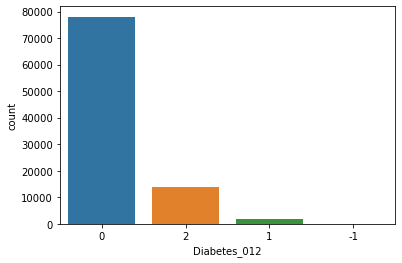

In [20]:
# También podemos vizualizar las proporciones con un diagrama de barras.
ax = sns.countplot(x='Diabetes_012', data=df_tracks_t)

In [21]:
def is_true (row, val):
    if row['Diabetes_012'] == val:
        return 1
    return 0
df_tracks_t['Diabetes0_label']=df_tracks_t.apply (lambda row: is_true (row,'0'), axis=1)
df_tracks_t['Diabetes2_label']=df_tracks_t.apply (lambda row: is_true (row,'2'), axis=1)

In [22]:
df_tracks_t.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes0_label,Diabetes2_label
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,1,0
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,1,0
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,1,0
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,1,0
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,1,0


In [23]:
pd.value_counts(df_tracks_t['Diabetes0_label'])

1    78022
0    15803
Name: Diabetes0_label, dtype: int64

In [24]:
pd.value_counts(df_tracks_t['Diabetes2_label'])

0    79950
1    13875
Name: Diabetes2_label, dtype: int64

In [25]:
lt = list(df_tracks_t.columns)
for i in lt:
    df_tracks_t[i] = df_tracks_t[i].astype(str).astype('int64')
df_tracks_t.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes0_label         int64
Diabetes2_label         int64
dtype: object

In [26]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = df_tracks_t.dtypes[(df_tracks_t.dtypes == np.int64) | (df_tracks_t.dtypes == np.float64)].index 
number_cols = df_tracks_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes0_label', 'Diabetes2_label'],
      dtype='object')

3. Construcción del modelo con árboles de decisión

4. Construcción del modelo con KNN.